# Session 4 - Homework ANGGORO Fajar Tri

## Exercise 3 Chapter 8

Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of ˆpm1. The xaxis should display ˆpm1, ranging from 0 to 1, and the y-axis should display the value of the Gini index, classification error, and entropy.

Hint: In a setting with two classes, pˆm1 = 1 − pˆm2. You could make this plot by hand, but it will be much easier to make in R.

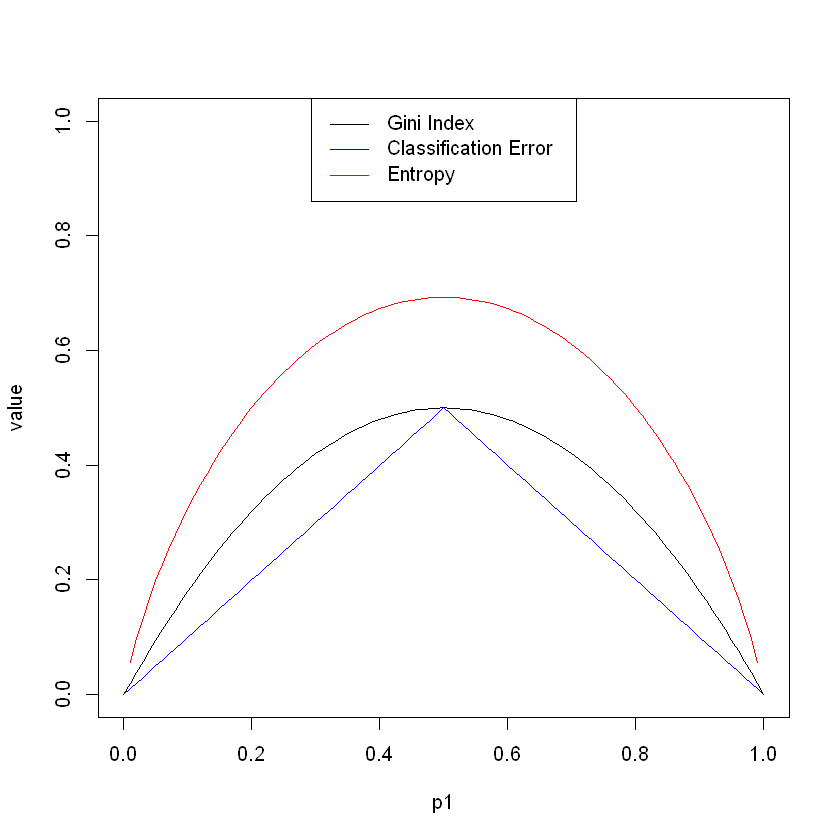

In [5]:
# Simulate Data
p = seq(0, 1, 0.01)

gini = 2*p*(1-p)
error= 1-pmax(p,1-p)
entropy= -(p*log(p)+(1-p)*log(1-p))

# add plot
plot(NA, NA, xlim=c(0,1), ylim=c(0,1), xlab='p1', ylab='value')

# add lines
lines(p, gini,type='l')
lines(p,error,col='blue')
lines(p,entropy,col='red')

legend(x='top',legend=c('Gini Index','Classification Error','Entropy'),
       col=c('black','blue','red'),lty=1,text.width = 0.28)

## Exercise 5 Chapter 8

Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X):

0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

In [1]:
# Based on Majority Vote approach, we take the majority of the 10 estimates. Here we have 6 estimates that leads to the class
# being in red, therefore we take the class = red

#Based on the average probability approach, we take the average of the 10 estimates, which yields to a final p = 0.45. Therefore
# we take the class = green

## Exercise 8 Chapter 8

In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

In [2]:
library(ISLR)
library(tree)

# a) Split the data set into a training set and a test set.
set.seed(42)
train = sample(1:nrow(Carseats),nrow(Carseats)/2)
train

[1]  49 321 153  74 228 146 122 400 128 303  24 327 356  89 165 110  20 370
 [19] 367 297 387 283 109   5 212 348 360 259 314 298 390 158 299 372 136 292
 [37] 324 395 378 375 197   4 226 355 215 245 114 262 130   3 258 186 138  40
 [55] 377  33 103 396 362 329 157  76 265  35 221  16 220 248 325 118 352  82
 [73] 332 385 296 149  57 100 371  91 269 181  54 288 208 246  60 285 108 126
 [91] 112  72 313   1 141 206 368  42 391 333 251 340  25 191  32 238  14 111
[109] 353 316 315 242 287 224 365 214  95   6 252 271  34 188 254 268 392  41
[127] 193  66 152  98 322 107 294 162 124 194 284 326 185 331  37 361 337  78
[145] 277 156 394  97 229 227 182 218 127  31 237  43 180 317  81 187  27  30
[163] 244 323 376  75 209 201 145  62  13 223 311 266  63 393  61 116 307 232
[181] 161  28   2 159 366 301 291 351 230  12 274 369  51 279 264 386  47  56
[199] 198 144

[1] 5.686401

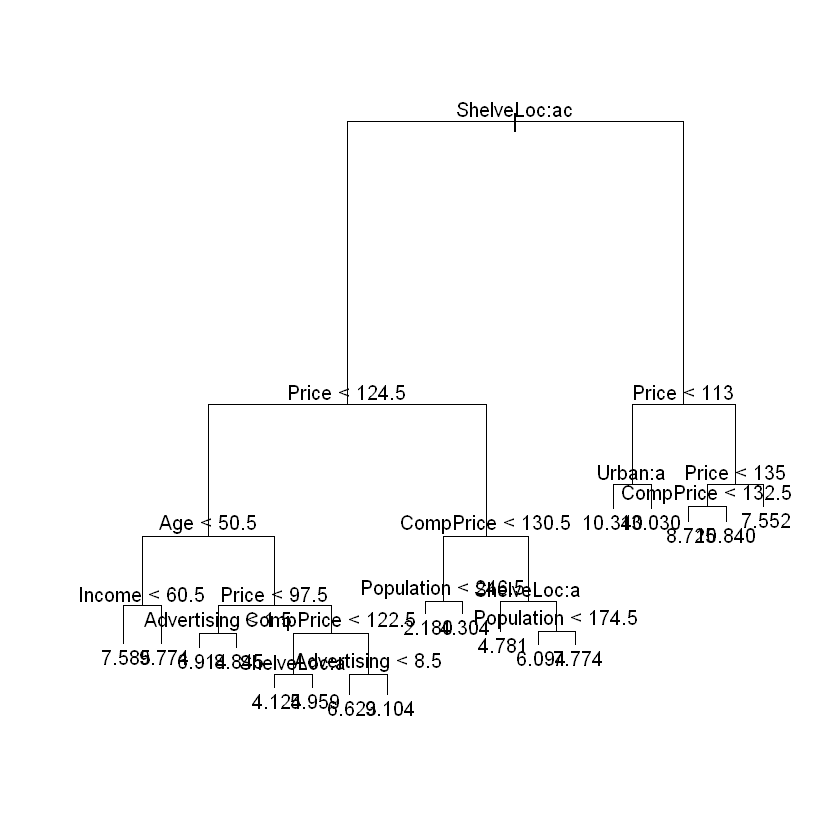

In [6]:
# b) Fit regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

tree.carseats = tree(formula = Sales~., data = Carseats,subset = train)
tree.pred = predict(tree.carseats,Carseats[-train,])

mean((tree.pred-Carseats[-train,'Sales'])^2)

plot(tree.carseats)
text(tree.carseats) # Price seems to be the most important criteria

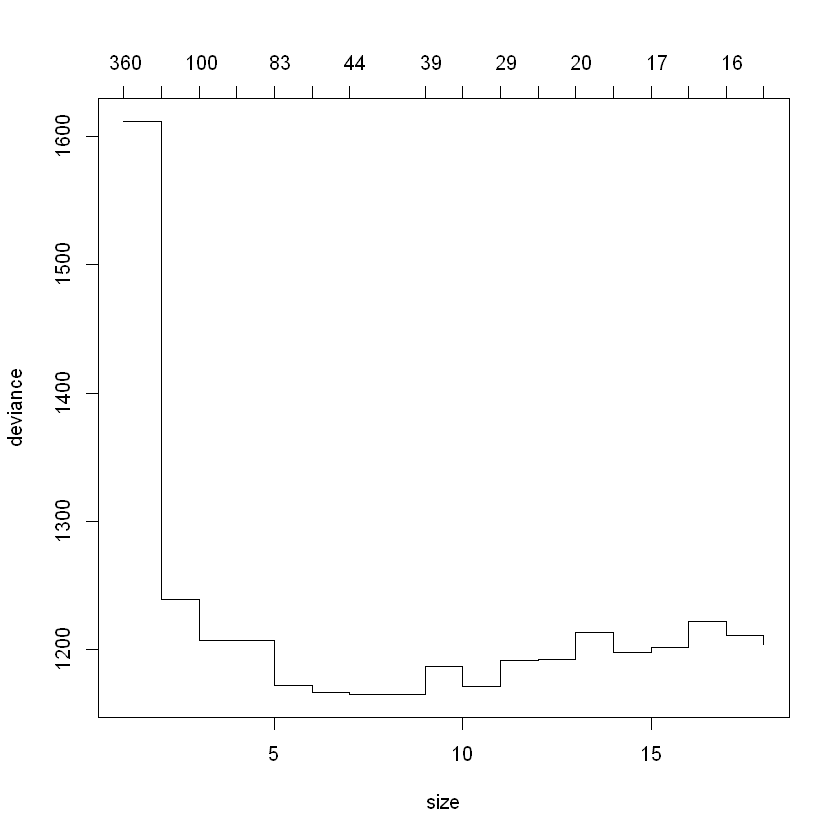

[1] 5.374136

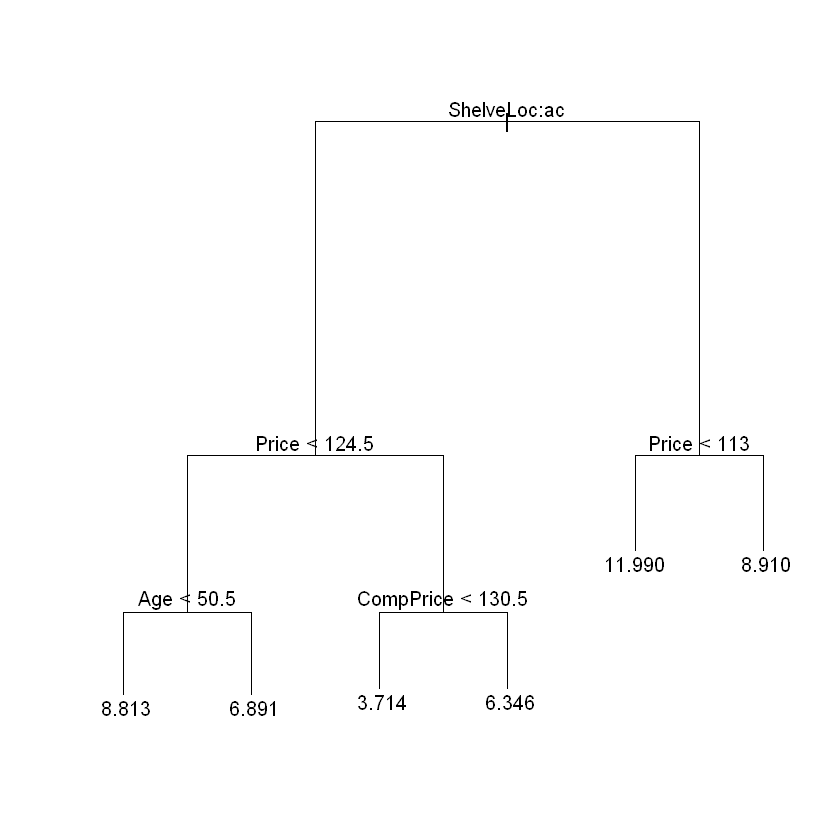

In [11]:
# c) Use cross-validation in order to determine the optimal level of tree complexity. 
# Does pruning the tree improve the test MSE?

# cross validation
tree.carseats.cv = cv.tree(tree.carseats) 
plot(tree.carseats.cv)

# pruning, set parameter to 6 based on the deviance
prune.carseats = prune.tree(tree.carseats,best=6)

# plot results
plot(prune.carseats)
text(prune.carseats) 

# pruning slightly improves the error
tree.pred = predict(prune.carseats,Carseats[-train,])
mean((tree.pred-Carseats[-train,'Sales'])^2)

In [13]:
# d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? 
# Use the importance() function to determine which variables are most important.

library(randomForest)

d = ncol(Carseats) - 1

# Model
set.seed(42)
carseats.rf = randomForest(Sales~., data = Carseats, subset = train, mtry = d, importance=TRUE , ntree=100)

# prediction
tree.pred = predict(carseats.rf,Carseats[-train,])
mean((tree.pred-Carseats[-train,'Sales'])^2)

# variable importance
importance(carseats.rf) # price is the most important

[1] 2.416614

,%IncMSE,IncNodePurity
CompPrice,12.75726583,194.553633
Income,3.69256439,114.061269
Advertising,8.45832790,99.943015
Population,1.77569889,62.016441
Price,24.81494474,428.177561
ShelveLoc,24.99332310,428.448690
Age,5.77226525,127.112993
Education,1.26746963,43.842548
Urban,-0.23884625,10.176602
US,-0.05329191,7.770429


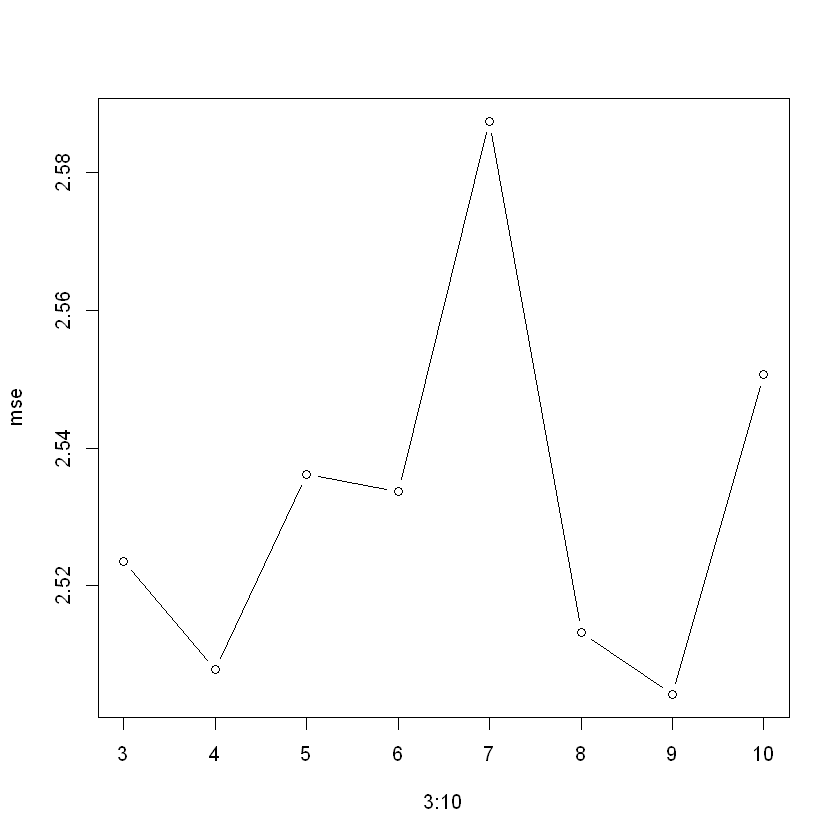

In [14]:
# e) Use random forests to analyze this data. What test MSE do you obtain? 
# Use the importance() function to determine which variables are most important. Describe the effect of m, the number of
# variables considered at each split, on the error rate obtained.

mse = c()

set.seed(42)

for(i in 3:10){
  carseats.rf = randomForest(Sales~., data = Carseats, subset = train, mtry = 5, importance = TRUE, ntree=100)

  tree.pred = predict(carseats.rf,Carseats[-train,])
  mse = rbind(mse,mean((tree.pred-Carseats[-train,'Sales'])^2))
}

# The effect of m
plot(3:10,mse,type='b')

,%IncMSE,IncNodePurity
CompPrice,12.9744625,197.97151
Income,5.1316050,103.17128
Advertising,5.4144641,110.59823
Population,-0.4748975,63.45821
Price,23.8930328,416.10410
ShelveLoc,25.0436020,417.41569
Age,4.1412728,133.36952
Education,0.5282113,46.89271
Urban,2.0743624,11.77462
US,-0.5563391,6.75921


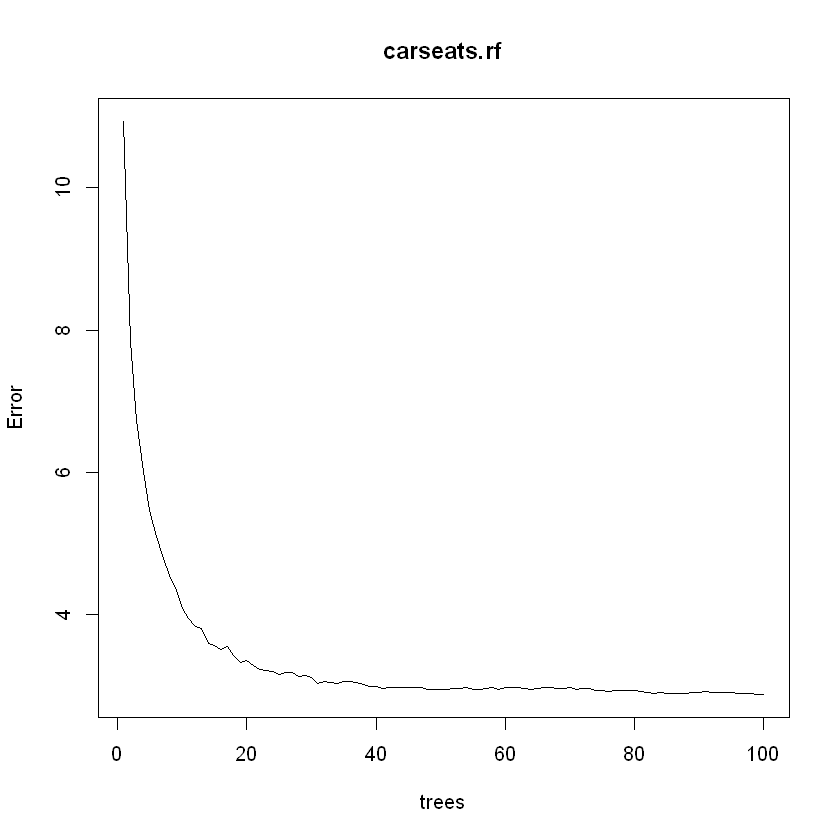

In [15]:
set.seed(42)
carseats.rf = randomForest(Sales~., data = Carseats, subset = train, mtry = 9, importance = TRUE, ntree=100)

# errors
plot(carseats.rf)

# var importance
importance(carseats.rf)

## Exercise 9 Chapter 8

This problem involves the OJ data set which is part of the ISLR package.

In [16]:
# a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

set.seed(42)
train=sample(1:nrow(OJ),800)

OJ_train=OJ[train,]
OJ_test=OJ[-train,]

In [17]:
# b)  Fit a tree to the training data, with Purchase as the response and the other variables as predictors. 
# Use the summary() function to produce summary statistics about the tree, and describe the results obtained. 
# What is the training error rate? How many terminal nodes does the tree have?

OJ_tree = tree(Purchase~., data = OJ_train)  
summary(OJ_tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ_train)
Variables actually used in tree construction:
[1] "LoyalCH"     "SalePriceMM" "PriceDiff"  
Number of terminal nodes:  8 
Residual mean deviance:  0.7392 = 585.5 / 792 
Misclassification error rate: 0.1638 = 131 / 800 

In [18]:
# c) Type in the name of the tree object in order to get a detailed text output. Pick one of the terminal nodes, and 
# interpret the information displayed.

OJ_tree
# One possible terminal node is the 4), split between LoyalCH, if it's under 0.064, it automatically assign as the 2nd class

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1066.00 CH ( 0.61500 0.38500 )  
   2) LoyalCH < 0.48285 285  296.00 MM ( 0.21404 0.78596 )  
     4) LoyalCH < 0.064156 64    0.00 MM ( 0.00000 1.00000 ) *
     5) LoyalCH > 0.064156 221  260.40 MM ( 0.27602 0.72398 )  
      10) SalePriceMM < 2.04 128  123.50 MM ( 0.18750 0.81250 ) *
      11) SalePriceMM > 2.04 93  125.00 MM ( 0.39785 0.60215 ) *
   3) LoyalCH > 0.48285 515  458.10 CH ( 0.83689 0.16311 )  
     6) LoyalCH < 0.753545 230  282.70 CH ( 0.69565 0.30435 )  
      12) PriceDiff < 0.265 149  203.00 CH ( 0.57718 0.42282 )  
        24) PriceDiff < -0.165 32   38.02 MM ( 0.28125 0.71875 ) *
        25) PriceDiff > -0.165 117  150.30 CH ( 0.65812 0.34188 )  
          50) LoyalCH < 0.703993 105  139.60 CH ( 0.61905 0.38095 ) *
          51) LoyalCH > 0.703993 12    0.00 CH ( 1.00000 0.00000 ) *
      13) PriceDiff > 0.265 81   47.66 CH ( 0.91358 0.08642 ) *
     7) LoyalCH > 0.753545 285  111

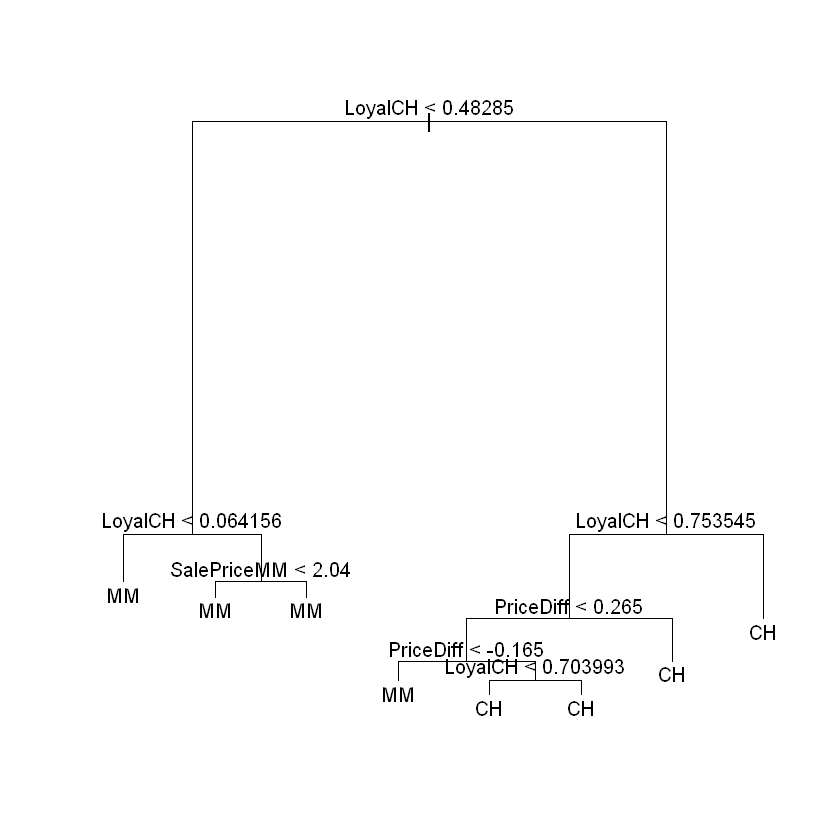

In [20]:
# d) Create a plot of the tree, and interpret the results.

plot(OJ_tree)
text(OJ_tree) # Same interpretation as before, LoyalCH is the most important variable

In [23]:
# e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test 
# labels. What is the test error rate?

OJ_pred_train = predict(OJ_tree, OJ_train, type = 'class')
table(OJ_train[,'Purchase'], OJ_pred_train)

# test set
OJ_pred_test = predict(OJ_tree, OJ_test, type = 'class')
table(OJ_test[,'Purchase'], OJ_pred_test)/nrow(OJ_test)
# an error of about 18%

    OJ_pred_train
      CH  MM
  CH 422  70
  MM  61 247

    OJ_pred_test
             CH         MM
  CH 0.46296296 0.13333333
  MM 0.05555556 0.34814815

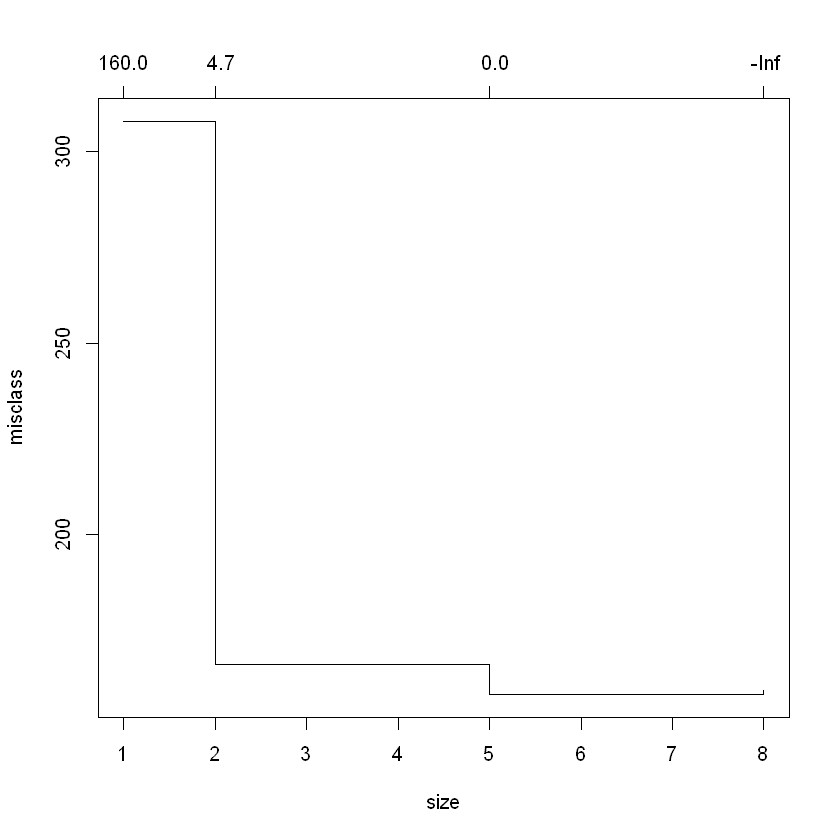

In [26]:
# f) Apply the cv.tree() function to the training set in order to determine the optimal tree size
# g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.
# h) Which tree size corresponds to the lowest cross-validated classification error rate?

set.seed(42)
OJ_tree_cv= cv.tree(OJ_tree,K = 10,FUN = prune.misclass)
plot(OJ_tree_cv) # Optimal is 5

In [27]:
# i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does 
# not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

OJ_tree = prune.misclass(OJ_tree, best = 5)

In [28]:
# j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

OJ_pred_train = predict(OJ_tree, OJ_train, type = 'class')
table(OJ_train[,'Purchase'], OJ_pred_train)/nrow(OJ_train)

    OJ_pred_train
          CH      MM
  CH 0.52750 0.08750
  MM 0.07625 0.30875

In [29]:
# k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

OJ_pred_test = predict(OJ_tree, OJ_test, type = 'class')
table(OJ_test[,'Purchase'], OJ_pred_test)/nrow(OJ_test) # similar results

    OJ_pred_test
             CH         MM
  CH 0.46296296 0.13333333
  MM 0.05555556 0.34814815

## Exercise 10 Chapter 8

We now use boosting to predict Salary in the Hitters data set.

In [30]:
# a)  Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

# remove NA
remove = is.na(Hitters[,"Salary"])
Hitters = Hitters[!remove,]

# log transform
Hitters[,"Salary"]=log(Hitters[,"Salary"])

summary(Hitters)

     AtBat            Hits           HmRun            Runs       
 Min.   : 19.0   Min.   :  1.0   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:282.5   1st Qu.: 71.5   1st Qu.: 5.00   1st Qu.: 33.50  
 Median :413.0   Median :103.0   Median : 9.00   Median : 52.00  
 Mean   :403.6   Mean   :107.8   Mean   :11.62   Mean   : 54.75  
 3rd Qu.:526.0   3rd Qu.:141.5   3rd Qu.:18.00   3rd Qu.: 73.00  
 Max.   :687.0   Max.   :238.0   Max.   :40.00   Max.   :130.00  
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 30.00   1st Qu.: 23.00   1st Qu.: 4.000   1st Qu.:  842.5  
 Median : 47.00   Median : 37.00   Median : 6.000   Median : 1931.0  
 Mean   : 51.49   Mean   : 41.11   Mean   : 7.312   Mean   : 2657.5  
 3rd Qu.: 71.00   3rd Qu.: 57.00   3rd Qu.:10.000   3rd Qu.: 3890.5  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0  
     CHits            CHmRun           CRuns    

In [31]:
# b)  Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

Hitters_train=Hitters[1:200,]
Hitters_test=Hitters[-c(1:200),]

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsLoaded gbm 2.1.8



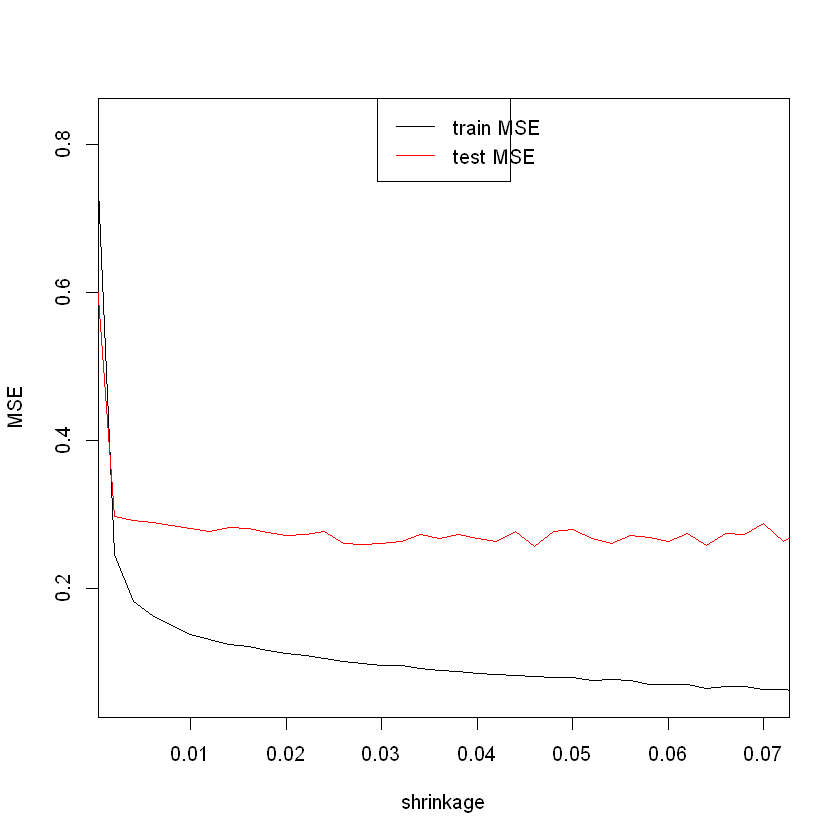

In [32]:
# c) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ. 
# Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis
# d)  Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

library(gbm)

train_mse=c()
test_mse=c()

# run different shrinkage
for(shr in seq(0,0.08,0.002)){
  Hitters_gbm = gbm(Salary~., data = Hitters_train,shrinkage = shr, n.trees = 1000, distribution = 'gaussian')
  
  # Train
  Hitters_pred = predict(Hitters_gbm, Hitters_train,n.trees = 1000)
  train_mse = rbind(train_mse, mean((Hitters_pred - Hitters_train[,'Salary'])^2))
  
  # Test
  Hitters_pred = predict(Hitters_gbm, Hitters_test,n.trees = 1000)
  test_mse = rbind(test_mse, mean((Hitters_pred - Hitters_test[,'Salary'])^2))
}

# plot results
plot(seq(0,0.08,0.002),train_mse,type='l', xlab='shrinkage',xlim = c(0.003,0.07),ylab='MSE')
lines(seq(0,0.08,0.002),test_mse,col='red')
legend(x='top',legend = c('train MSE','test MSE'),col=c('black','red'),lty=1,text.width = 0.005)

In [34]:
# e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in
# Chapters 3 and 6.

tb=c()

# Boosting
Hitters_gbm = gbm(Salary~., data = Hitters_train, shrinkage = 0.01,n.trees = 1000,distribution = 'gaussian')
Hitters_pred = predict(Hitters_gbm, Hitters_test, n.trees = 1000)
tb=cbind(tb,'Boost' = mean((Hitters_pred - Hitters_test[,'Salary'])^2))

# Ch3 - linear regression
Hitters_lm = lm(Salary~., Hitters_train)
Hitters_pred = predict(Hitters_lm, Hitters_test)
tb = cbind(tb,'Linear'= mean((Hitters_pred - Hitters_test[,'Salary'])^2))

# Ch6 - ridge regression
library(glmnet)

x = model.matrix(Salary ~ ., data = Hitters_train)
x_test = model.matrix(Salary ~ ., data = Hitters_test)
y = Hitters_train$Salary

Hitters_glm = glmnet(x, y, alpha = 0)
Hitters_pred = predict(Hitters_glm, x_test)
tb = cbind(tb,'Ridge'=mean((Hitters_pred - Hitters_test[,'Salary'])^2))

print(tb)

        Boost    Linear     Ridge
[1,] 0.274711 0.4917959 0.5145349


,var,rel.inf
,<chr>,<dbl>
CAtBat,CAtBat,25.93102332
CRBI,CRBI,12.97409589
CHits,CHits,10.90462357
CWalks,CWalks,8.14224324
CRuns,CRuns,8.06903590
CHmRun,CHmRun,6.23489477
Years,Years,6.04384082
Hits,Hits,4.07772465
Walks,Walks,3.72255704


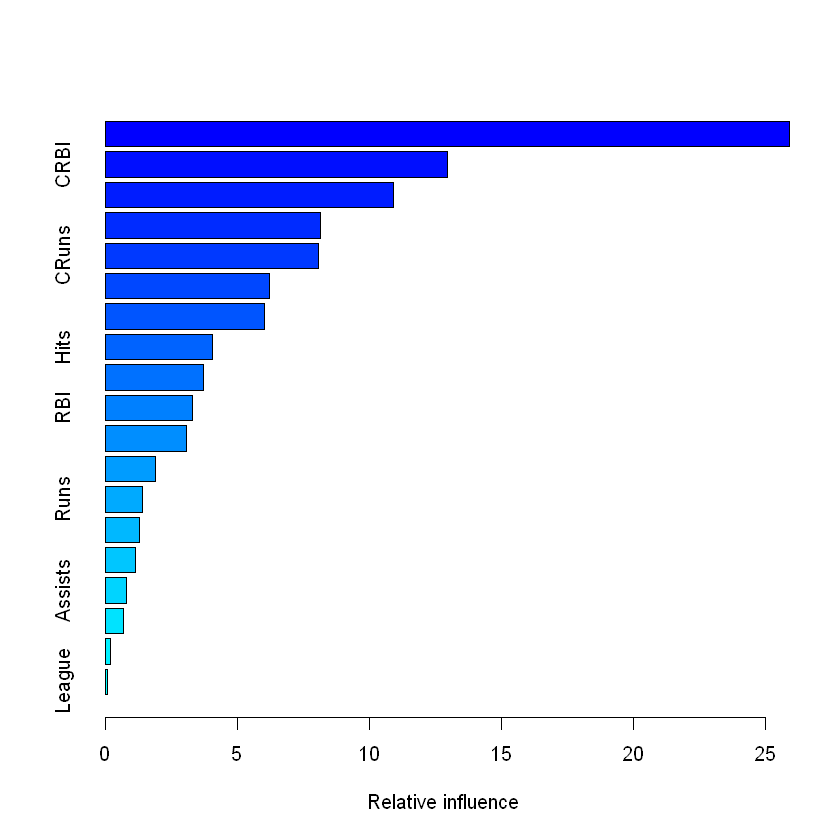

In [36]:
# f) Which variables appear to be the most important predictors in the boosted model?

summary(Hitters_gbm)

In [37]:
# g) Now apply bagging to the training set. What is the test set MSE for this approach?

Hitters_rf=randomForest(Salary~., data = Hitters_train, mtry=ncol(Hitters_train)-1)
Hitters_pred = predict(Hitters_rf, Hitters_test)
mean((Hitters_pred - Hitters_test[,'Salary'])^2)

[1] 0.2296772

### Source
https://rpubs.com/evertonjlima/242633